In [15]:
import pandas as pd
import numpy as np
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import os

ims_files = os.listdir('/Users/jacobmetz/Documents/GitHub/facebook-marketplaces-recommendation-ranking-system/data/resized_images')

print(ims_files[:10])

image_arrays = []

for file in ims_files[:20]:
    image = io.imread(f'/Users/jacobmetz/Documents/GitHub/facebook-marketplaces-recommendation-ranking-system/data/resized_images/{file}')
    array1 = np.asarray(image)
    array2 = array1.reshape(-1)
    image_arrays.append(array2)

categorys = [0, 1, 2, 3, 4, 1, 1, 1, 2, 3, 0, 1, 2, 3, 4, 1, 1, 1, 2, 3]

X = np.array(image_arrays)
y = np.array(categorys)
print(X)

['01721f79-81de-4a78-afa4-fe72f812ce1d.jpg_resized.jpg', '499a56dd-c8c0-4580-8729-73faab9ca391.jpg_resized.jpg', '7c9ce6e8-74bd-4f57-938a-4a0d50b4a7fe.jpg_resized.jpg', 'e761f1db-135c-49cc-beb4-942de8b9115e.jpg_resized.jpg', '8da79808-ef2f-4505-929f-42aee48e11e6.jpg_resized.jpg', '47b844bd-8da0-4d0d-8264-f0a7459b17e6.jpg_resized.jpg', 'f49c3276-8992-44a0-9067-139b94f65e9f.jpg_resized.jpg', '27a20117-3442-472f-8ba7-12de65787662.jpg_resized.jpg', '6b745396-fb4d-4ec7-b246-11bbead59048.jpg_resized.jpg', '2e7ad23e-120e-4a85-8bf5-f24ffc6441a1.jpg_resized.jpg']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg.fit(X, y)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

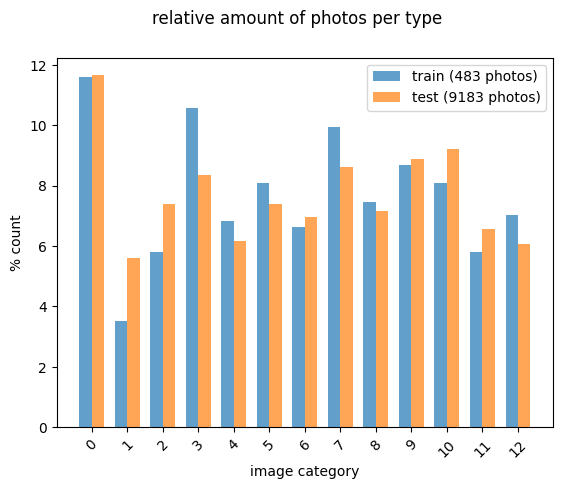

In [2]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('image category')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);